## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## Dataset

In [2]:
df = pd.read_csv('Language_Detection.csv', encoding = 'ISO-8859-1')

In [3]:
df.head()

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


### Understanding the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10338 entries, 0 to 10337
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      10337 non-null  object
 1   Language  10336 non-null  object
dtypes: object(2)
memory usage: 161.7+ KB


In [5]:
df.drop(df.loc[:, 'Unnamed: 2':'Unnamed: 19'].columns, axis=1, inplace  = True)

In [6]:
df.shape

(10338, 2)

In [7]:
df.isnull().sum()

Text        1
Language    2
dtype: int64

In [8]:
df[df.duplicated()]

,Text,Language
1141,i'm sorry.,English
1180,oh my god.,English
1196,i'm sorry.,English
1724,à´à´¨àµà´¨àµà´¾à´àµ à´àµà´·à´®à´¿à´àµ...,Malayalam
1767,à´ à´à´¨àµà´±àµ à´¦àµà´µà´®àµ.,Malayalam
...,...,...
9707,Ach du lieber Gott.,German
9727,Es tut mir Leid.,German
10082,à²¨à²¨à³à²¨à²¨à³à²¨à³ à²à³à²·à²®à²¿à²¸à³.,Kannada
10126,à² à²¦à³à²µà²°à³.,Kannada


In [9]:
df.drop(df[df.duplicated()].index, axis=0, inplace=True)

In [10]:
df.shape

(10272, 2)

In [11]:
df["Language"].nunique()

17

In [12]:
df["Language"].value_counts()

English       1382
French        1007
Spanish        816
Portugeese     736
Italian        694
Russian        688
Sweedish       673
Malayalam      591
Dutch          542
Arabic         532
Turkish        471
German         465
Tamil          464
Danish         424
Kannada        366
Greek          358
Hindi           61
Name: Language, dtype: int64

## Bar Graph

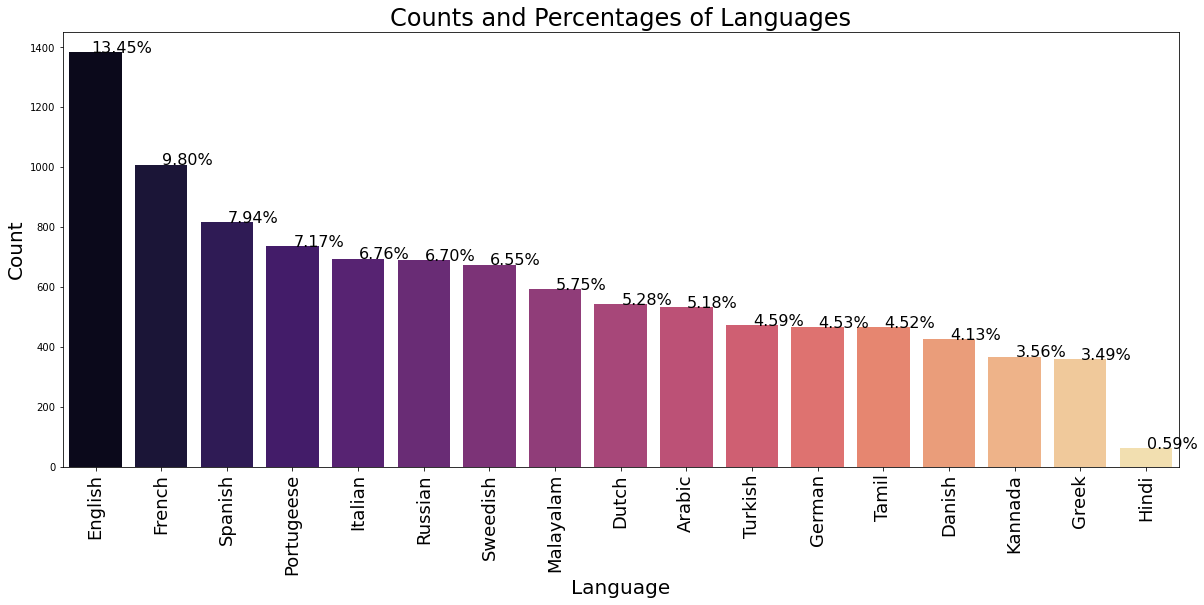

In [13]:
plt.figure(figsize=(20,8))

total= float(len(df['Language']))
ax= sns.countplot(x= 'Language', data= df, order= df['Language'].value_counts().index, palette= 'magma')

for p in ax.patches:
    percentage= '{:.2f}%'.format(100 * p.get_height()/total)
    x= p.get_x() + p.get_width()
    y= p.get_height()
    ax.annotate(percentage, (x, y), fontsize=16, ha='center')
    
plt.title('Counts and Percentages of Languages', fontsize=24)
plt.xlabel("Language",fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.xticks(size= 18, rotation=90) 
plt.show()


In [14]:
language= df['Language'].value_counts().reset_index()
language

,index,Language
0,English,1382
1,French,1007
2,Spanish,816
3,Portugeese,736
4,Italian,694
5,Russian,688
6,Sweedish,673
7,Malayalam,591
8,Dutch,542
9,Arabic,532


## Pie Chart

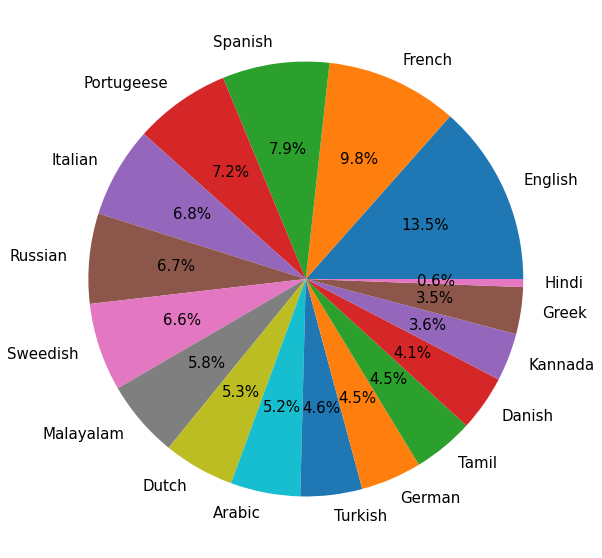

In [15]:
plt.figure(figsize=(10,10))

#create pie chart
labels= language['index']

plt.pie(language["Language"], labels= labels, autopct='%.1f%%', textprops={'fontsize': 15})

plt.show()

## Text Preprocessing

In [16]:
df1= df.copy()
df1['cleaned_Text']= ""
df1

,Text,Language,cleaned_Text
0,"Nature, in the broadest sense, is the natural...",English,
1,"""Nature"" can refer to the phenomena of the phy...",English,
2,"The study of nature is a large, if not the onl...",English,
3,"Although humans are part of nature, human acti...",English,
4,[1] The word nature is borrowed from the Old F...,English,
...,...,...,...
10333,à²¨à²¿à²®à³à²® à²¤à²ªà³à²ªà³ à²à²¨à³ à²¬à...,Kannada,
10334,à²¨à²¾à²°à³à²¸à²¿à²¸à²¾ à²¤à²¾à²¨à³ à²®à³à²...,Kannada,
10335,à²¹à³à²à³ ' à²¨à²¾à²°à³à²¸à²¿à²¸à²¿à²¸à²®à...,Kannada,
10336,à² à²µà²³à³ à²à² à²¹à³à²à³à²à³ à²à²¿à...,Kannada,


### removing the symbols and numbers

In [17]:
import re
def clean_function(Text):
    # removing the symbols and numbers
    Text = re.sub(r'[\([{})\]!@#$,"%^*?:;~`0-9]', ' ', str(Text))
    
    # converting the text to lower case
    Text = Text.lower()
    Text = re.sub('http\S+\s*', ' ', str(Text))  # remove URLs
    Text = re.sub('RT|cc', ' ', str(Text))  # remove RT and cc
    Text = re.sub('#\S+', '', str(Text))  # remove hashtags
    Text = re.sub('@\S+', '  ', str(Text))  # remove mentions
    Text = re.sub('\s+', ' ', str(Text))  # remove extra whitespace
    
    return Text

In [18]:
df1['cleaned_Text'] = df1['Text'].apply(lambda x: clean_function(x))
df1

,Text,Language,cleaned_Text
0,"Nature, in the broadest sense, is the natural...",English,nature in the broadest sense is the natural p...
1,"""Nature"" can refer to the phenomena of the phy...",English,nature can refer to the phenomena of the phys...
2,"The study of nature is a large, if not the onl...",English,the study of nature is a large if not the only...
3,"Although humans are part of nature, human acti...",English,although humans are part of nature human activ...
4,[1] The word nature is borrowed from the Old F...,English,the word nature is borrowed from the old fren...
...,...,...,...
10333,à²¨à²¿à²®à³à²® à²¤à²ªà³à²ªà³ à²à²¨à³ à²¬à...,Kannada,à²¨à²¿à²®à³à²® à²¤à²ªà³à²ªà³ à²à²¨à³ à²¬à...
10334,à²¨à²¾à²°à³à²¸à²¿à²¸à²¾ à²¤à²¾à²¨à³ à²®à³à²...,Kannada,à²¨à²¾à²°à³à²¸à²¿à²¸à²¾ à²¤à²¾à²¨à³ à²®à³à²...
10335,à²¹à³à²à³ ' à²¨à²¾à²°à³à²¸à²¿à²¸à²¿à²¸à²®à...,Kannada,à²¹à³à²à³ ' à²¨à²¾à²°à³à²¸à²¿à²¸à²¿à²¸à²®à...
10336,à² à²µà²³à³ à²à² à²¹à³à²à³à²à³ à²à²¿à...,Kannada,à² à²µà²³à³ à²à² à²¹à³à²à³à²à³ à²à²¿à...


In [19]:
X= df1["cleaned_Text"]     # independent variable
y= df1["Language"]    # dependent variable

## Label Encoding

Language names make up our output variable, which is a categorical variable. 
We are conducting label encoding on that output variable 
because we should need to turn it into a numerical form for training the model. 
We are importing LabelEncoder from sklearn for this procedure.

In [20]:
from sklearn.preprocessing import LabelEncoder

encoder= LabelEncoder()

y= encoder.fit_transform(y)

## Bag of Words

As is common knowledge, both the input and the output features must be in numerical form.Therefore, 
using CountVectorizer to build a Bag of Words model, we are converting text into numerical form.

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
CV= CountVectorizer()
X= CV.fit_transform(X).toarray()
X.shape

(10272, 28026)

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=42)

## Building Model

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

models = {
    'K-Nearest Neighbors' : KNeighborsClassifier(),
    'Random Forest' : RandomForestClassifier(),
    'MNB' : MultinomialNB()    
}

### Train the model

In [28]:
for name, model in models.items():
    print(f'{name} training started...')
    model.fit(X_train, y_train)
    print(f'{name} trained')

K-Nearest Neighbors training started...
K-Nearest Neighbors trained
Random Forest training started...
Random Forest trained
MNB training started...
MNB trained


## Model evaluation

In [29]:

from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix as CM
from sklearn.metrics import classification_report

## Accuracy score

In [30]:
for name in models:
    acc_score= round(accuracy_score(y_test, models.get(name).predict(X_test)), 3)
    print(f'{name} accuracy score :  {acc_score}')

K-Nearest Neighbors accuracy score :  0.612
Random Forest accuracy score :  0.953
MNB accuracy score :  0.986


The accuracy of the MNB model is 0.98 which is very good and our model is performing well

## Classification report

In [31]:
for name in models:
    print(f'{name} classification report')
    print(classification_report(y_test, models.get(name).predict(X_test)))
    print(" ")

K-Nearest Neighbors classification report
              precision    recall  f1-score   support

           0       0.19      1.00      0.32       148
           1       0.81      0.59      0.68       102
           2       0.72      0.42      0.53       133
           3       0.98      0.53      0.69       361
           4       0.78      0.56      0.65       255
           5       0.98      0.43      0.60       113
           6       0.67      0.84      0.75        79
           7       1.00      0.92      0.96        12
           8       0.92      0.38      0.54       155
           9       1.00      1.00      1.00        83
          10       1.00      1.00      1.00       161
          11       0.93      0.48      0.64       178
          12       0.94      0.90      0.92       151
          13       0.83      0.41      0.55       205
          14       0.97      0.54      0.69       183
          15       0.35      0.99      0.52       111
          16       1.00      0.19      

## Confusion Matrix

K-Nearest Neighbors ConfusionMatrix


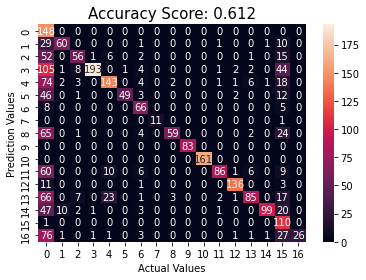

Random Forest ConfusionMatrix


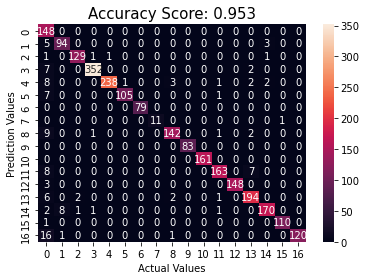

MNB ConfusionMatrix


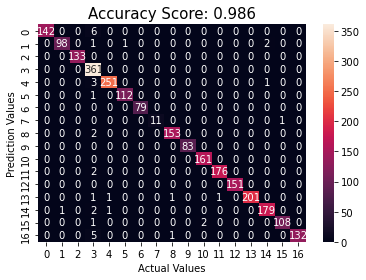

In [32]:
for name in models:
    print(f'{name} ConfusionMatrix')
    predictions= models.get(name).predict(X_test)
    score = round(accuracy_score(y_test, models.get(name).predict(X_test)), 3)
    confusionMatrix = CM(y_test, models.get(name).predict(X_test))
    sns.heatmap(confusionMatrix, annot=True, fmt=".0f")
    plt.xlabel('Actual Values')
    plt.ylabel('Prediction Values')
    plt.title('Accuracy Score: {0}'.format(score), size = 15)
    plt.show()

## Prediction

In [33]:
def prediction(text):
    x= CV.transform([text]).toarray()
    lang= model.predict(x)
    lang= encoder.inverse_transform(lang)
    print("This word/sentence contains {} word(s).".format(lang[0]))

In [36]:
prediction("Your memory improves as you learn a language. In addition, since your brain will automatically translate, it enables the brain to work in a versatile way and contributes to the development of your abilities.")

This word/sentence contains English word(s).


In [40]:
prediction("L'apprentissage d'une langue améliore la mémoire. De plus, comme votre cerveau traduira automatiquement, cela lui permet de travailler de manière polyvalente et contribue au développement de vos compétences.")

This word/sentence contains French word(s).


In [42]:
prediction("Bir dil öğrenirken hafızanız gelişir. Ayrıca beyniniz otomatik olarak çeviri yapacağı için beynin çok yönlü çalışmasını sağlar ve yeteneklerinizin gelişimine katkıda bulunur.")

This word/sentence contains Turkish word(s).


## Model Saving

In [43]:
import pickle
pickle.dump(model, open("model.pkl", "wb"))
pickle.dump(CV, open("transform.pkl", "wb"))